# Problem Set 1

### Before You Start

For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.

Note: you do not have to use notebooks to solve this PS.  However, you have to submit
* your code
* your results
* your explanations
whatever means you use to solve this assignment.

It is all fine to discuss the problems and way how to solve these with
your classmates and instructors.  However, the solutions must be your
own.  Don't copy-paste each other solutions!

## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

Your task is to analyze the nycflights13 data (in the R package of the
                                               same name).  The
                                               necessary csv
files are provided on canvas (in files/data).  An easy way to get the
explanations is on the the [package page on R documentation](https://www.rdocumentation.org/packages/nycflights13/versions/1.0.0). 

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.

Always comment your results, preferably in a separate markdown cell.


## Preliminaries

You should also make sure the following libraries load correctly.
Below are a few basic data description tasks already done for you. 

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.8.0 (need at least 1.0)
Numpy version:        1.17.2 (need at least 1.7.1)
SciPy version:         1.3.1 (need at least 0.12.0)
Pandas version:       0.25.1 (need at least 0.11.0)
Mapltolib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.21.3 (need at least 0.13.1)


In [7]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
print(path)
flights_df= pd.read_csv('~/Downloads/flights.csv.bz2')

/Users/iguest/Desktop/IMT 574


In [8]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [9]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
tail
         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771    

## Some Tips

* This assignment involves extensive Data frame splitting and
  aggregation. You should look into the details of the methods
  groupby, transform, sum, count, mean etc 
* Many of the tasks in the assignment can be done either through the
  Pandas Data Frame or by converting the data frames to Series. Many
  of the methods in the numpy are applicable to Series only. When
  stuck, try to explore the type of object (Pandas Data Frame or Numpy
  Series) you are dealing with. 

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [13]:
# Your code here
print('Number of flights from NYC to LAX is' ,len(flights_df[flights_df.dest =='LAX']))

Number of flights from NYC to LAX is 16174


### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [18]:
# Your code here
# Check number of flights for each airline
LAX = flights_df[flights_df.dest =='LAX']
x = LAX['carrier'].value_counts()
x
print('The carrier that has the max number of flights is United Airlines with',max(x),'flights from NYC to LAX')
print('The carrier that has the least number of flights is Jet Blue',min(x),'flights from NYC to LAX')

The carrier that has the max number of flights is United Airlines with 5823 flights from NYC to LAX
The carrier that has the least number of flights is Jet Blue 1688 flights from NYC to LAX


### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [20]:
# Your code here
unique_planes = LAX['tailnum'].nunique()
unique_planes

991

### (d)

What is the average arrival delay for flights from NYC to LAX?

In [21]:
# Your code here
avg_delay = LAX['arr_delay'].mean()
avg_delay

0.5471109447148383

### (e)

What proportion of flights to LAX come from each NYC airport?

In [22]:
# Your code here
#Group by count of origin and then calculate %
proportion = 100*(LAX['origin'].value_counts()/LAX['dest'].count())
proportion 


JFK    69.630271
EWR    30.369729
Name: origin, dtype: float64

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [31]:
# Your code here
#Group by departure/arrival delay and then find the largest

dep_delay = flights_df.groupby(['month','day'])['dep_delay'].mean().idxmax()
print('The largest avg departure delay was during the',dep_delay[0],'rd month (March) on the',dep_delay[1],'th day')

arr_delay = flights_df.groupby(['month','day'])['arr_delay'].mean().idxmax()
print('The largest avg arrival delay was during the',arr_delay[0],'rd month (March) on the',arr_delay[1],'th day')

The largest avg departure delay was during the 3 rd month (March) on the 8 th day
The largest avg arrival delay was during the 3 rd month (March) on the 8 th day


### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [43]:
# Your code here
#Worst Days to fly  out of NYC would mean the departure delay:
#If we consider any delay greater than 0 minutes
print(flights_df[flights_df.dep_delay>0.0].groupby(['month','day'])['dep_delay'].count().idxmax())

#If we consider any delay greater than 2 minutes
print(flights_df[flights_df.dep_delay>2.0].groupby(['month','day'])['dep_delay'].count().idxmax())

#Best day to fly out of NYC will be the one having a departure delay less than 0:
print(flights_df[flights_df.dep_delay<0.0].groupby(['month','day'])['dep_delay'].count().idxmax())


(12, 23)
(3, 8)
(10, 29)


### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [49]:
# Your code here
airline_max_dep_delay = flights_df.groupby(['carrier'])['dep_delay'].mean().idxmax()
print('The airline with the average greatest departure delay is',airline_max_dep_delay,'Frontier Airlines')

airline_min_dep_delay = flights_df.groupby(['carrier'])['dep_delay'].mean().idxmin()
print('The airline with the average lowest departure delay is',airline_min_dep_delay,'US Airways')


The airline with the average greatest departure delay is F9 Frontier Airlines
The airline with the average lowest departure delay is US US Airways


### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

winter    10.036665
winter    10.816843
spring    13.227076
spring    13.938038
spring    12.986859
summer    20.846332
summer    21.727787
summer    12.611040
fall       6.722476
fall       6.243988
fall       5.435362
winter    16.576688
Name: dep_delay, dtype: float64


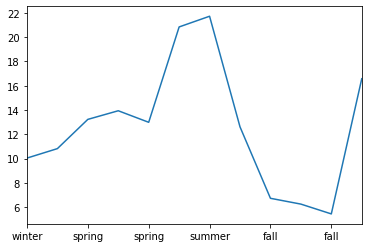

Thus we can see that seasonally speaking,Summer sees the longest departure delay of 18 minutes on an average.While Fall experiences the shortest delay of about 6 minutes on an average.
When the pattern is obeserved monthly seems to be an increase in delays in the months of June,July and December which coincide with the start of summer, Independence Day and Christmas respectively. Due to it being festive season, there are more flights and that might be an explanation for the increased delays. Also December experiences harsh weather conditions that contribute to the delays.


In [53]:
# Your code here
#groupby months and their respective seasons
monthly_delay = flights_df.groupby("month").dep_delay.mean()
index = ['winter', 'winter','spring', 'spring', 'spring', 'summer', 'summer', 'summer', 'fall', 'fall','fall', 'winter']
#assigning seasons to months
monthly_delay.index = (index)
print(monthly_delay)
#graph
monthly_delay.plot()
plt.show()

print('Thus we can see that seasonally speaking,Summer sees the longest departure delay of 18 minutes on an average.While Fall experiences the shortest delay of about 6 minutes on an average.')

print('When the pattern is obeserved monthly seems to be an increase in delays in the months of June,July and December which coincide with the start of summer, Independence Day and Christmas respectively. Due to it being festive season, there are more flights and that might be an explanation for the increased delays. Also December experiences harsh weather conditions that contribute to the delays.')


### (e)

On average, how do departure delays vary over the course of a day?

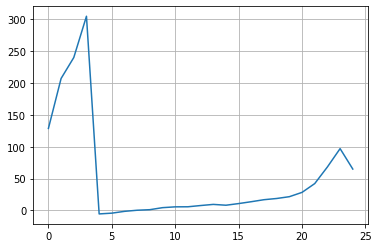

In [54]:
# Your code here
#Plot departure delay grouped by hour
dep_delay_daily = flights_df.groupby(['hour'])['dep_delay'].mean()
plt.plot(dep_delay_daily)
plt.grid()
plt.show()

print('It is seen that departure delay increases rapidly from 12 to 4 AM where its the highest. Then afterwarads flights from 4 to 6 AM seem to be leaving early or on time. And after that there is a steady increase in the departure delay, with a slight jump at 11 PM.')

## Question 3

Which flight departing NYC in 2013 flew the slowest?

Note: compute the speed as distance/time.

In [62]:
# Your code here
flights_df['speed']=flights_df['distance']*60/flights_df['air_time']
flights_df= flights_df.sort_values(by='speed', ascending=True)
print(flights_df.head())
print('Flight 1860 from (LGA)La Guardia to (PHL) Philadelphia flew the slowest with a speed of 76.8 mph')

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
24098        24099  2013      1   28    1917.0       52.0    2118.0   
248839      248840  2013      6   29     755.0       -5.0    1035.0   
305879      305880  2013      8   28     932.0       -8.0    1116.0   
25455        25456  2013      1   30    1037.0       42.0    1221.0   
80009        80010  2013     11   27     556.0       -4.0     727.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
24098       103.0      US  N755US    1860    LGA  PHL      75.0        96   
248839       86.0      B6  N328JB    1491    JFK  ACK     141.0       199   
305879       25.0      9E  N8932C    3608    JFK  PHL      61.0        94   
25455        81.0      9E  N832AY    3667    JFK  PHL      59.0        94   
80009        29.0      US  N951UW    1909    LGA  PHL      60.0        96   

        hour  minute      speed  
24098   19.0    17.0  76.800000  
248839   7.0    55.0  84.680851  
305879  

## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [66]:
# Your code here
#zgroup by carrier, flight, dest, then print the combinations that have 365 occurances
for key, group in flights_df.groupby(['carrier', 'flight', 'dest']):
    if len(group) == 365:
        print(key)

('AA', 59, 'SFO')
('AA', 119, 'LAX')
('AA', 181, 'LAX')
('AA', 1357, 'SJU')
('AA', 1611, 'MIA')
('B6', 219, 'CLT')
('B6', 359, 'BUR')
('B6', 371, 'FLL')
('B6', 431, 'SRQ')
('B6', 703, 'SJU')
('B6', 1783, 'MCO')
('DL', 2159, 'MCO')
('DL', 2391, 'TPA')
('EV', 5712, 'IAD')
('UA', 15, 'HNL')
('VX', 251, 'LAS')
('VX', 407, 'LAX')
('VX', 413, 'LAX')


In [ ]:
#There are 18 flights that run daily.
#The 13 unique destinations include: MIA, SJU, LAX, CLT, HNL, BUR, FLL, SRQ, MCO, IAD, LAS, SFO, TPA

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

In [68]:
#QUESTION : Which carriers have performed the best and the worst in terms of both departure and arrival delay?
#HOW IS THIS INFORMATION USEFUL?
#This helps identify the carriers that are consistently on time as well as delayed.This will help commuters plan their travel.
#We look at the we flights that are departing and arriving late. We do not consider those that departed late but arrived on time or before time.

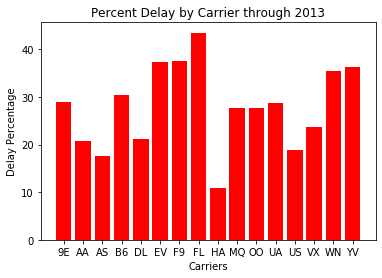

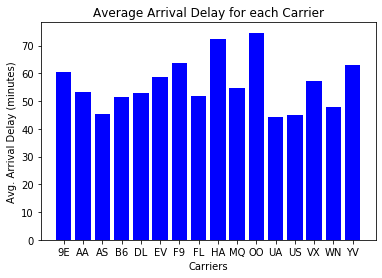

In [72]:
#Flights having arr_delay>0 and dep_delay>0
df2 = flights_df[(flights_df.arr_delay>0) & (flights_df.dep_delay>0)]  

#Grouping by carrier 
grouped_df2 = df2.groupby([df2.carrier]).size().reset_index(name='Number')
grouped_df2

#Removing nulls
final_df2 = flights_df[np.isfinite(flights_df['dep_time'])] 

#Grouping by carrier and taking count
count = final_df2.groupby([final_df2.carrier]).size().reset_index(name='Total_Number')
count

#Merging 
carrier_performance = pd.merge(grouped_df2, count, on=['carrier'])

#Calculating Percentage delays
carrier_performance['Percentage_Delays'] = (carrier_performance.Number/carrier_performance.Total_Number)*100

carrier_performance

#Plotting Percent Delay by Carrier through 2013
ind = np.arange(len(carrier_performance.carrier))
plt.bar(ind, carrier_performance.Percentage_Delays, color="red")
plt.ylabel('Delay Percentage')
plt.xlabel('Carriers')
plt.title('Percent Delay by Carrier through 2013')
plt.xticks(ind, carrier_performance.carrier)
plt.show()

#Grouping by carrier for mean arrival delay
df_mean_arr_delay = df2.groupby([df2.carrier])['arr_delay'].mean().reset_index(name='Mean_Arrival_Delay')

#Plotting Average Arrival Delay for each Carrier
ind = np.arange(len(df_mean_arr_delay.carrier))
plt.bar(ind, df_mean_arr_delay.Mean_Arrival_Delay, color="blue")
plt.ylabel('Avg. Arrival Delay (minutes)')
plt.xlabel('Carriers')
plt.title('Average Arrival Delay for each Carrier')
plt.xticks(ind, carrier_performance.carrier)
plt.show()


In [73]:
#RESULTS:
#Carrier Performance : % of flights delayed in arrival and departure and avg arrival delay for each carrier
 
# The First visualization is of % delay/carrier for 2013 and we see that FL has the highest % delay, thus making it the worst performer.HA has the best performance in terms of delay % (lowest delay %).

#Looking at the visualization for avg arrival delay/carrier we see that HA and OO have higher arrival delays while UA and US have the best performance in terms of arrival delay. We consider the avg arrival delay as delay in arrival is more crucial than departure delay which does not guarentee that a delay overall.



## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [79]:
weather_df= pd.read_csv('~/Downloads/weather.csv.bz2')

#Merge Datasets
flights_df['date_time'] = pd.to_datetime(flights_df[['year', 'month', 'day', 'hour']])
weather_df['date_time'] = pd.to_datetime(weather_df[['year', 'month', 'day', 'hour']])
new_df = flights_df.merge(weather_df,on='date_time')



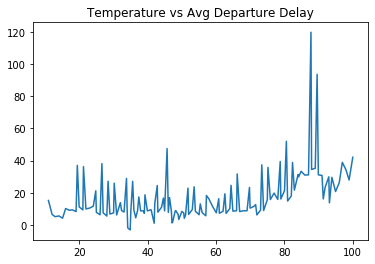

In [81]:
temp = new_df.groupby(['temp'])['dep_delay'].mean()
plt.plot(temp)
plt.title('Temperature vs Avg Departure Delay')
plt.show()

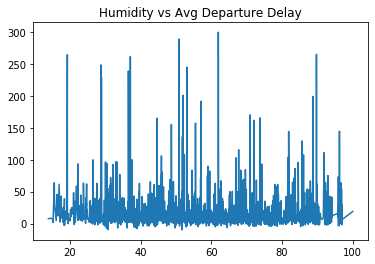

In [82]:
temp = new_df.groupby(['humid'])['dep_delay'].mean()
plt.plot(temp)
plt.title('Humidity vs Avg Departure Delay')
plt.show()

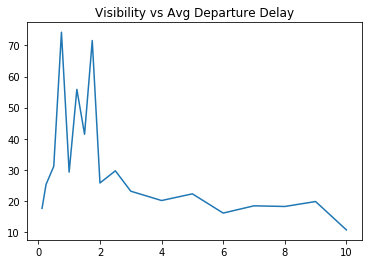

In [83]:
temp = new_df.groupby(['visib'])['dep_delay'].mean()
plt.plot(temp)
plt.title('Visibility vs Avg Departure Delay')
plt.show()

In [ ]:
#We can see that lower visibility increases delays and higher temperature have no on departure delay.

#Humidity does not seem to have an effect on delays since the distribution seems to be uniform across the range of values.

# Grading

* Q1: 1pt each question (5 in total)
* Q2: a) 2pt, b) 3pt, c) 2pt, d) 2pt, e) 1pt
* Q3: 5pt
* Q4: 5pt
* Q5: 15pt
* Q6: 10pt